In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
color = sns.color_palette()
df  = pd.read_csv("mass-shooting.csv",encoding = 'ISO-8859-1')
df['date'] = pd.to_datetime(df['Date'])
df['year'] = df['date'].dt.year

Maximum fatalties  226 MAximum peple injured  558


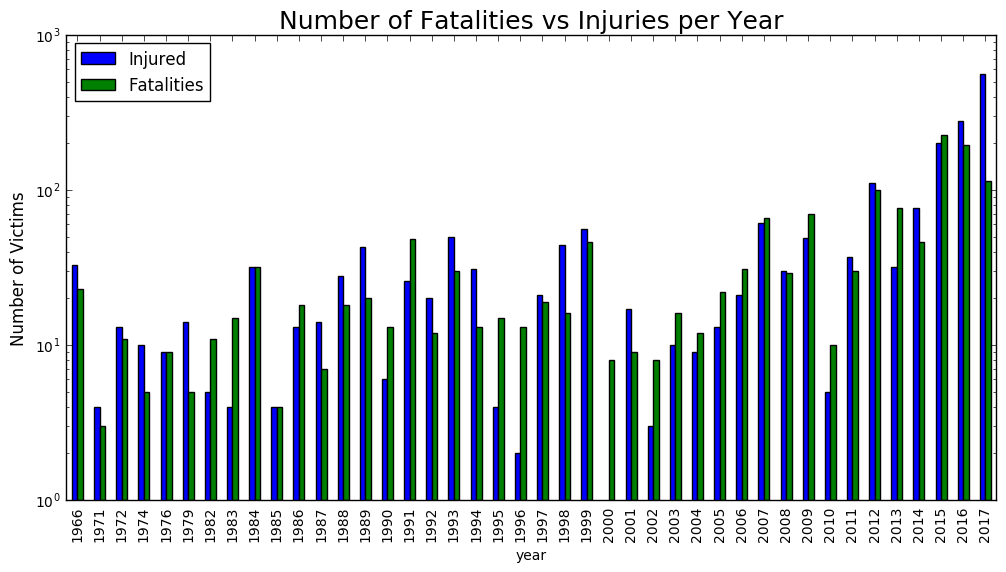

In [2]:
tot_victims = df[['year','Injured', 'Fatalities']].groupby('year').sum()
print("Maximum fatalties ",tot_victims['Fatalities'].max(),"MAximum peple injured ",tot_victims['Injured'].max())
tot_victims.plot.bar(figsize=(12,6),log=True)
plt.ylabel('Number of Victims', fontsize=12)
plt.title('Number of Fatalities vs Injuries per Year', fontsize=18)
plt.show()

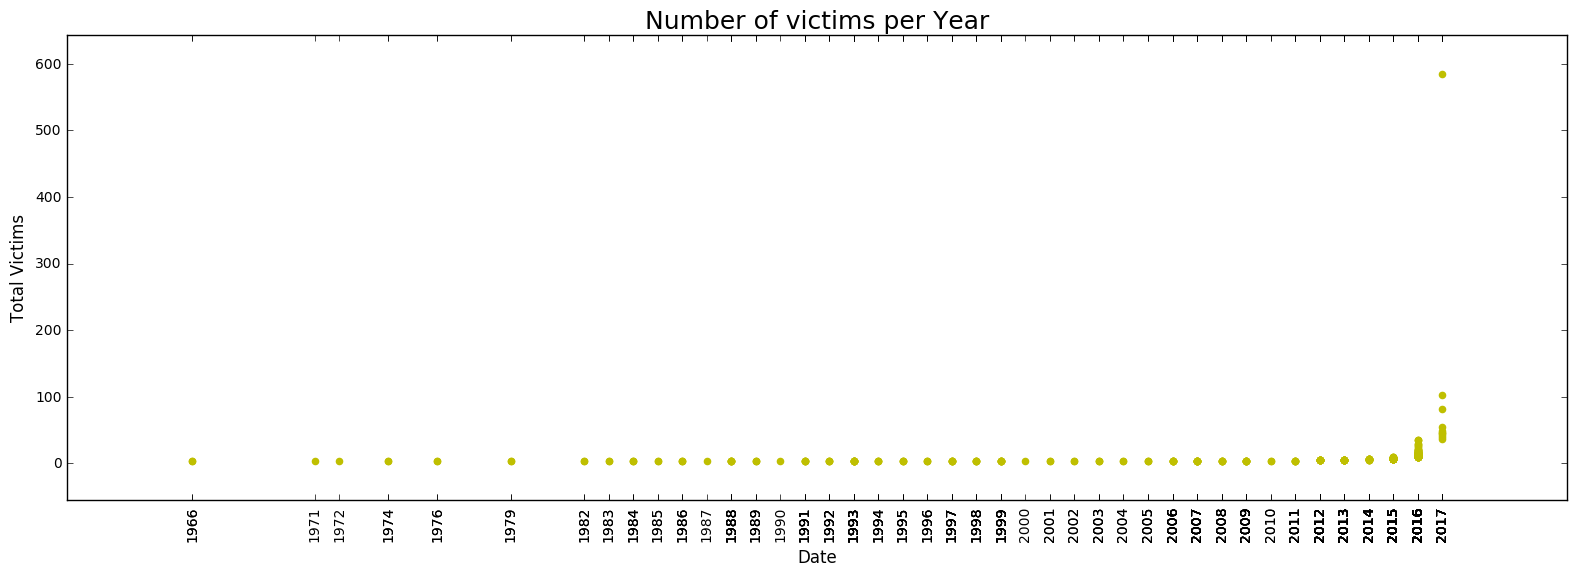

In [3]:
plt.figure(figsize=(8,6))
plt.xticks(np.sort(df['year']), rotation='vertical')
plt.margins(0.1,tight=True)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None,
                wspace=None, hspace=None)
plt.scatter(np.sort(df['year']), np.sort(df['Total victims'].values),color=color[5])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.title('Number of victims per Year', fontsize=18)
plt.show()

Maximum number of attacks 69


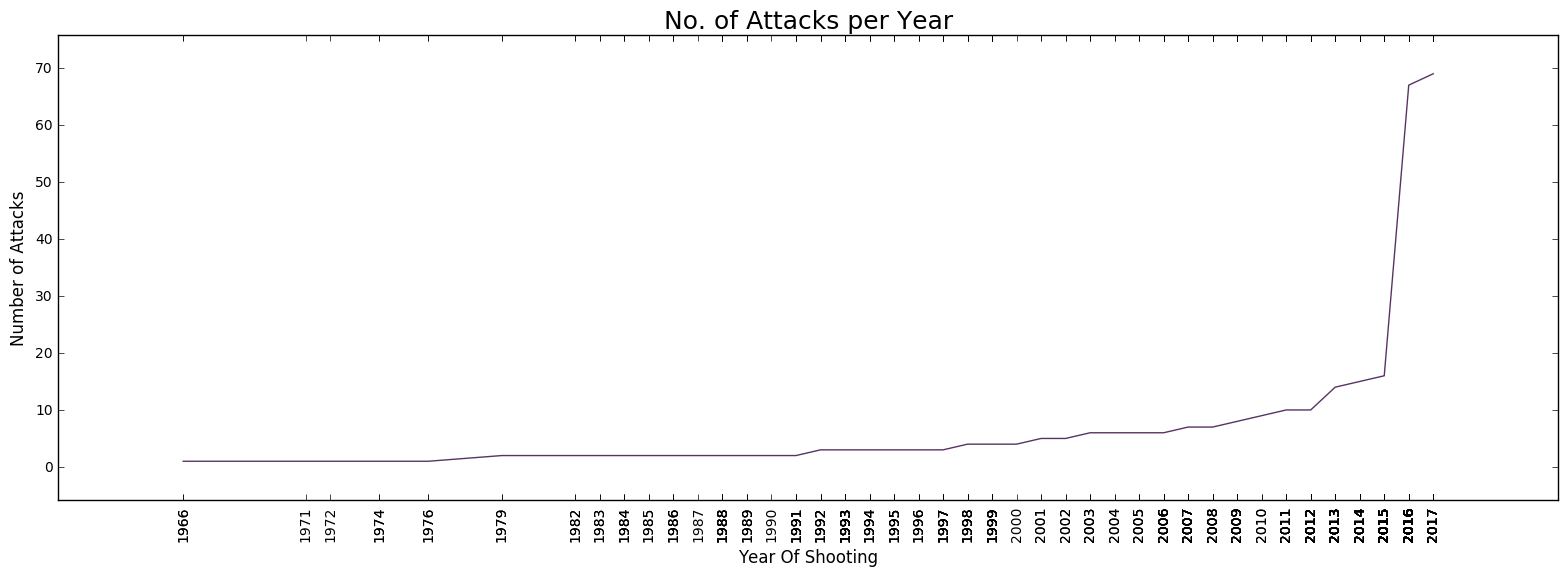

In [4]:
color =sns.cubehelix_palette(7)
cnt_srs = df['year'].value_counts()
print("Maximum number of attacks",cnt_srs.max())
plt.figure(figsize=(8,6))
plt.xticks(np.sort(df['year']), rotation='vertical')
plt.margins(0.1,tight=True)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None,
                wspace=None, hspace=None)
plt.plot(np.sort(cnt_srs.index), np.sort(cnt_srs.values),color=color[5])
plt.xlabel('Year Of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Year', fontsize=18)
plt.show()

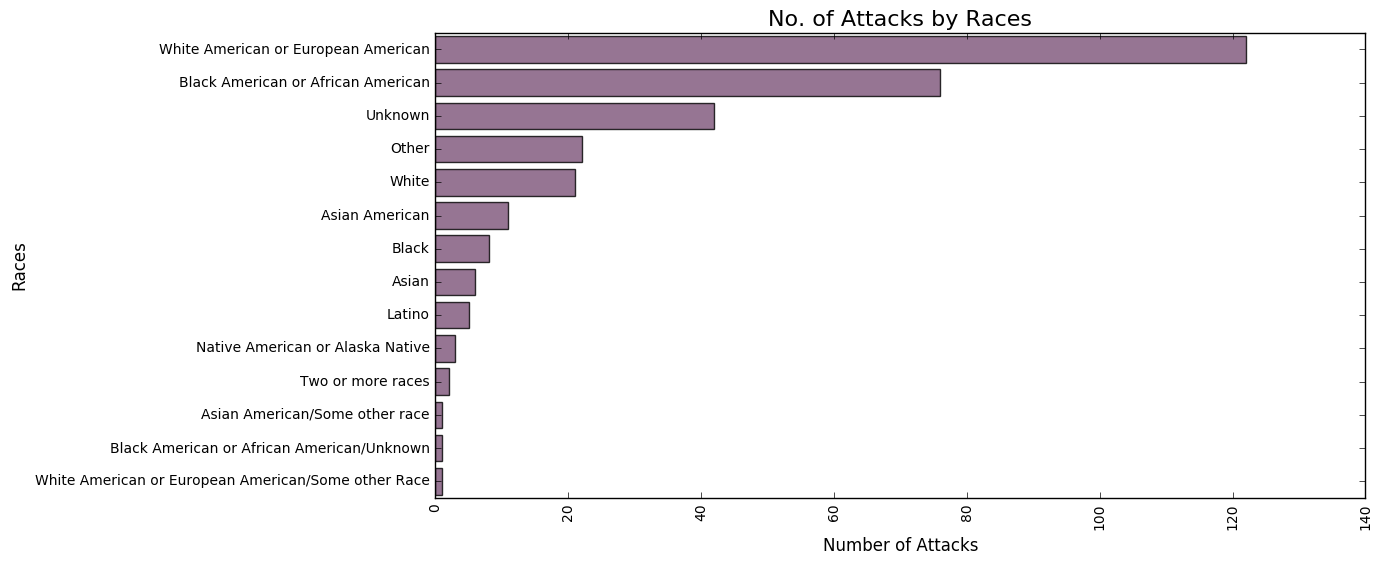

In [5]:
df.Race.replace(['white', 'black', 'Some other race', 'unclear'], ['White', 'Black', 'Other','Unknown'], inplace=True)

cnt_srs = df['Race'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.values,cnt_srs.index, alpha=0.8, color=color[4])
plt.xticks(rotation='vertical')
plt.ylabel('Races', fontsize=12)
plt.xlabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Races', fontsize=16)
plt.show()

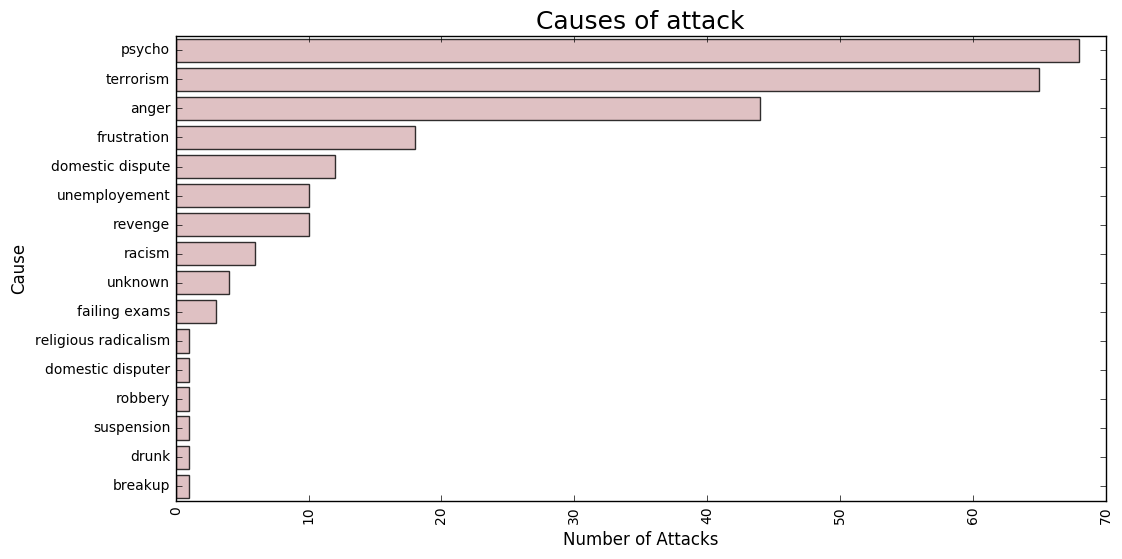

In [6]:
cnt_srs = df['Cause'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.values,cnt_srs.index, alpha=0.8, color=color[1])
plt.xticks(rotation='vertical')
plt.ylabel('Cause', fontsize=12)
plt.xlabel('Number of Attacks', fontsize=12)
plt.title('Causes of attack', fontsize=18)
plt.show()



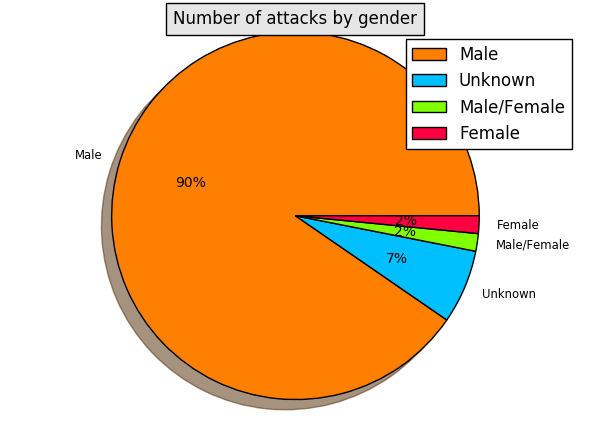

In [7]:
df.Gender.replace(['M', 'M/F'], ['Male', 'Male/Female'], inplace=True)
cnt_srs = df['Gender'].value_counts()
labels = cnt_srs.index
values = cnt_srs.values
colors = ['#ff8000', '#00bfff', '#80ff00', '#ff0040']
#patches, texts = plt.pie(values, shadow=True, startangle=90)
patches, texts, autotexts = plt.pie(values, labels=labels,
                                    autopct='%.0f%%',colors=colors,
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Number of attacks by gender', bbox={'facecolor':'0.9', 'pad':5})
plt.show()

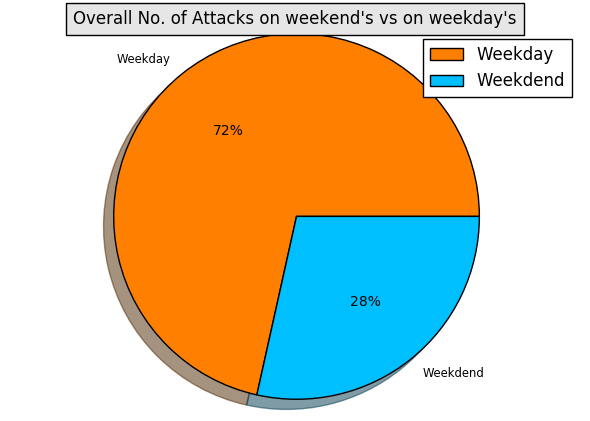

In [8]:
df['DoW'] = df['date'].dt.dayofweek
df['weekdayflg'] =( df['DoW'] // 5 != 1).astype(float)
cnt_srs = df['weekdayflg'].value_counts()
labels = ['Weekday','Weekdend']
values = cnt_srs.values
colors = ['#ff8000', '#00bfff', '#80ff00', '#ff0040']
#patches, texts = plt.pie(values, shadow=True, startangle=90)
patches, texts, autotexts = plt.pie(values, labels=labels,
                                    autopct='%.0f%%',colors=colors,
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("Overall No. of Attacks on weekend's vs on weekday's", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

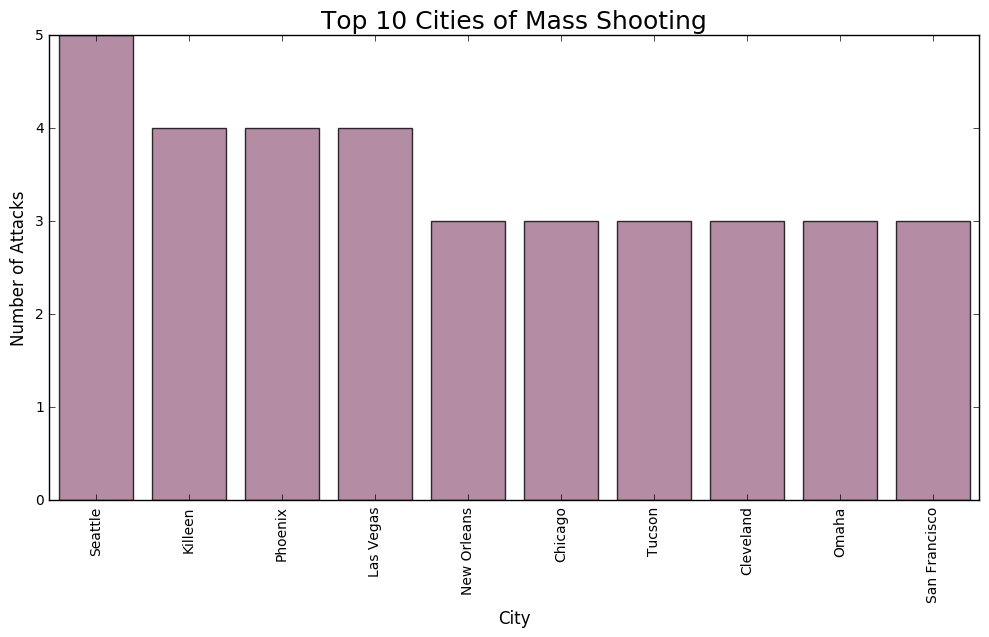

In [9]:
df['City'] = df['Location'].str.rpartition(',')[0]
top_cities = df['City'].value_counts()
top_cities = top_cities.head(10)
plt.figure(figsize=(12,6))
sns.barplot(top_cities.index, top_cities.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Cities of Mass Shooting', fontsize=18)
plt.show()